In [84]:
import pandas as pd

In [85]:
data = pd.read_csv('../data/raw/Airbnb_Data.csv')

In [86]:
data.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,...,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,...,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,...,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,...,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,...,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,...,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [88]:
data.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


Eliminar columnas

In [89]:
drop = ["zipcode", "thumbnail_url", "host_has_profile_pic", "id", "description", "name", "first_review", "last_review", "host_since", "host_identity_verified", "neighbourhood"]

data.drop(drop, axis=1, inplace=True)

In [90]:
data.columns

Index(['log_price', 'property_type', 'room_type', 'amenities', 'accommodates',
       'bathrooms', 'bed_type', 'cancellation_policy', 'cleaning_fee', 'city',
       'host_response_rate', 'instant_bookable', 'latitude', 'longitude',
       'number_of_reviews', 'review_scores_rating', 'bedrooms', 'beds'],
      dtype='object')

# Manejo de valores faltantes y duplicados

In [91]:
# Registros duplicados exactamente
duplicates = data.duplicated()
print(f"Numero de duplicados: {duplicates.sum()}")

Numero de duplicados: 0


In [92]:
print(data.isnull().sum())

log_price                   0
property_type               0
room_type                   0
amenities                   0
accommodates                0
bathrooms                 200
bed_type                    0
cancellation_policy         0
cleaning_fee                0
city                        0
host_response_rate      18299
instant_bookable            0
latitude                    0
longitude                   0
number_of_reviews           0
review_scores_rating    16722
bedrooms                   91
beds                      131
dtype: int64


Porcentajes

In [93]:
data["host_response_rate"].value_counts()

host_response_rate
100%    43254
90%      2277
80%      1113
0%        883
50%       611
        ...  
39%         1
23%         1
15%         1
31%         1
21%         1
Name: count, Length: 80, dtype: int64

In [94]:
data['host_response_rate'] = data['host_response_rate'].str.replace('%', '').astype(float) / 100

In [95]:
data['host_response_rate'].value_counts()

host_response_rate
1.00    43254
0.90     2277
0.80     1113
0.00      883
0.50      611
        ...  
0.39        1
0.23        1
0.15        1
0.31        1
0.21        1
Name: count, Length: 80, dtype: int64

In [96]:
#llenar valores faltantes con -1
data['host_response_rate'] = data['host_response_rate'].fillna(-1)

In [97]:
data['host_response_rate'].value_counts()

host_response_rate
 1.00    43254
-1.00    18299
 0.90     2277
 0.80     1113
 0.00      883
         ...  
 0.39        1
 0.23        1
 0.15        1
 0.31        1
 0.21        1
Name: count, Length: 81, dtype: int64

Transformar a bool

In [98]:
data["instant_bookable"].replace({"t":True,"f":False}, inplace=True)

/var/folders/cj/2frknbdj19582gkccp1xmkrh0000gn/T/ipykernel_37108/2092879572.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data["instant_bookable"].replace({"t":True,"f":False}, inplace=True)
/var/folders/cj/2frknbdj19582gkccp1xmkrh0000gn/T/ipykernel_37108/2092879572.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silen

In [99]:
data["instant_bookable"]

0        False
1         True
2         True
3        False
4         True
         ...  
74106    False
74107    False
74108     True
74109     True
74110    False
Name: instant_bookable, Length: 74111, dtype: bool

Input -1

In [100]:
data['bedrooms'] = data['bedrooms'].fillna(-1)
data['beds'] = data['beds'].fillna(-1)
data['bathrooms'] = data['beds'].fillna(-1)
data["review_scores_rating"] = data['review_scores_rating'].fillna(-1).astype(float)

In [101]:
print(data.isnull().sum())

log_price               0
property_type           0
room_type               0
amenities               0
accommodates            0
bathrooms               0
bed_type                0
cancellation_policy     0
cleaning_fee            0
city                    0
host_response_rate      0
instant_bookable        0
latitude                0
longitude               0
number_of_reviews       0
review_scores_rating    0
bedrooms                0
beds                    0
dtype: int64


# Outliers

In [102]:
data.describe()

,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000,74111.000000
mean,4.782069,3.155146,1.706076,0.463639,38.445958,-92.397525,20.900568,72.616885,1.263011,1.706076
std,0.717394,2.153589,1.258196,0.849996,3.080167,21.705322,37.828641,40.332290,0.855309,1.258196
min,0.000000,1.000000,-1.000000,-1.000000,33.338905,-122.511500,0.000000,-1.000000,-1.000000,-1.000000
25%,4.317488,2.000000,1.000000,0.000000,34.127908,-118.342374,1.000000,80.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,1.000000,40.662138,-76.996965,6.000000,94.000000,1.000000,1.000000
75%,5.220356,4.000000,2.000000,1.000000,40.746096,-73.954660,23.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,18.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


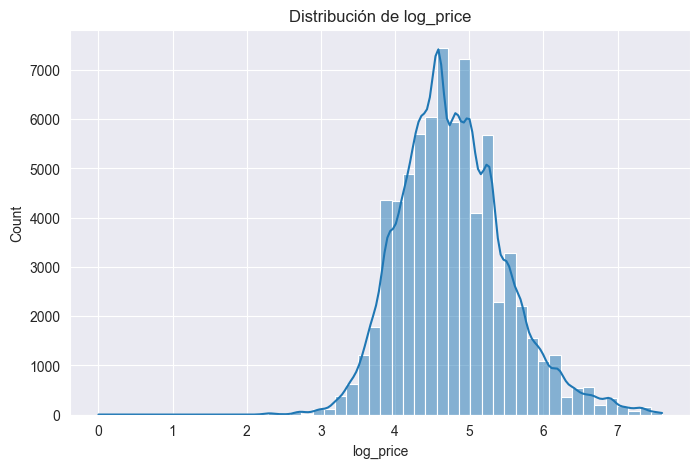

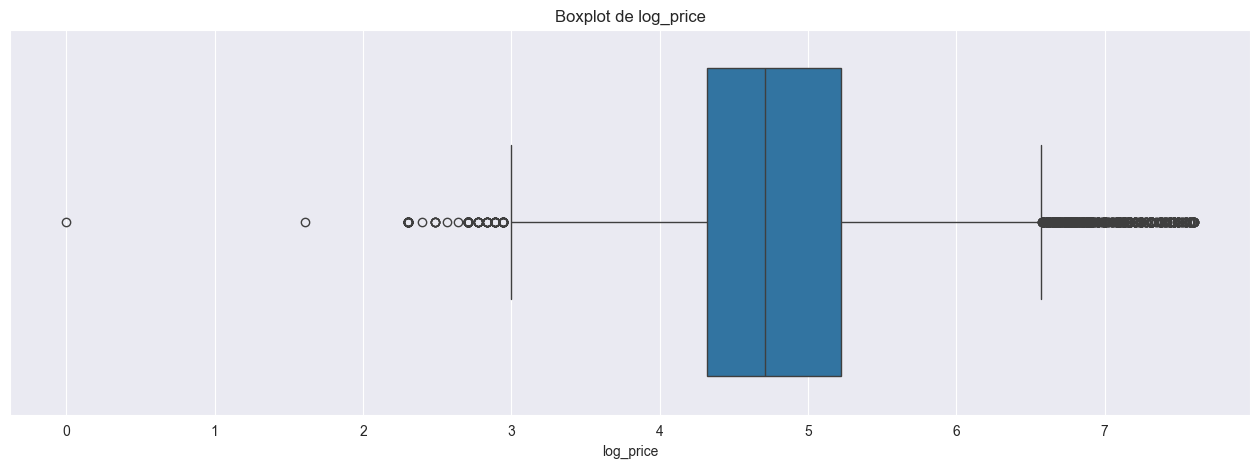

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma
plt.figure(figsize=(8,5))
sns.histplot(data['log_price'], bins=50, kde=True)
plt.title('Distribución de log_price')
plt.show()

# Boxplot
plt.figure(figsize=(16,5))
sns.boxplot(x=data['log_price'])
plt.title('Boxplot de log_price')
plt.show()


conteo de posibles outliers

In [104]:
Q1 = data['log_price'].quantile(0.25)
Q3 = data['log_price'].quantile(0.75)
IQR = Q3 - Q1

# límites para outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar outliers
outliers = data[(data['log_price'] < lower_bound) | (data['log_price'] > upper_bound)]
outliers_lower = outliers[outliers['log_price'] < lower_bound]
outliers_upper = outliers[outliers['log_price'] > upper_bound]
print(f"Limite inferior:{lower_bound}")
print(f"Limite superior:{upper_bound}")
print(f"Total de outliers detectados: {len(outliers)}")
print(f"Ouliers low: {len(outliers_lower)}")
print(f"Ouliers high: {len(outliers_upper)}")


Limite inferior:2.9631865462232887
Limite superior:6.574657392391346
Total de outliers detectados: 1532
Ouliers low: 160
Ouliers high: 1372


In [105]:
outliers_lower["log_price"].value_counts()

log_price
2.708050    58
2.302585    30
2.944439    26
2.890372    16
2.833213    10
2.772589    10
2.484907     5
1.609438     1
0.000000     1
2.639057     1
2.564949     1
2.397895     1
Name: count, dtype: int64

In [106]:
outliers_upper["log_price"].value_counts()

log_price
6.907755    180
6.684612    151
6.620073    106
7.313220    105
7.090077     80
           ... 
6.817831      1
7.025538      1
7.013016      1
6.714171      1
7.377134      1
Name: count, Length: 192, dtype: int64

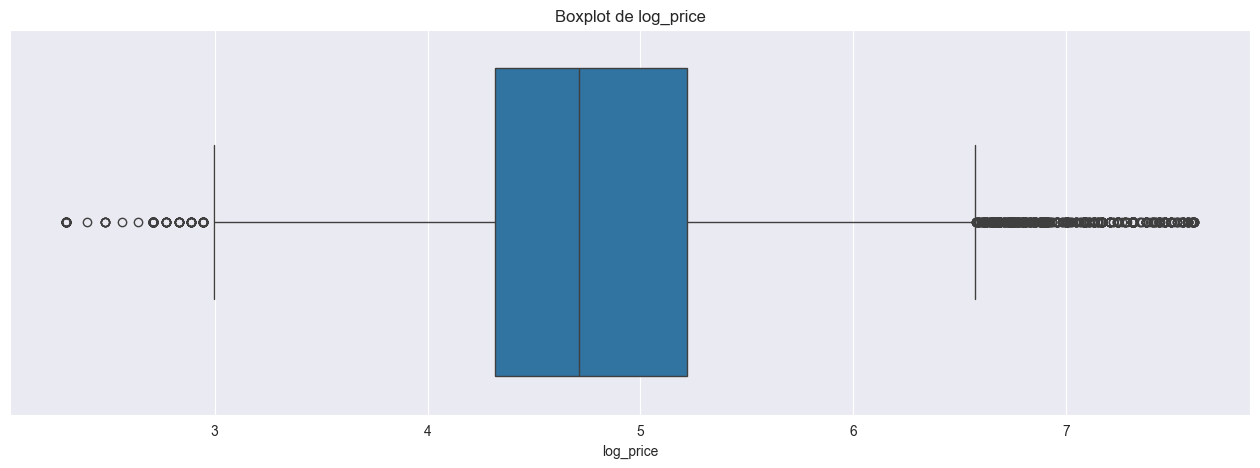

In [107]:
# Eliminar registros con log_proce menor a 2
data = data[data['log_price'] > 2]
# Boxplot
plt.figure(figsize=(16,5))
sns.boxplot(x=data['log_price'])
plt.title('Boxplot de log_price')
plt.show()

In [108]:
data.describe()

,log_price,accommodates,bathrooms,host_response_rate,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000,74109.000000
mean,4.782176,3.155190,1.706095,0.463624,38.445895,-92.398024,20.901078,72.616322,1.263031,1.706095
std,0.717094,2.153599,1.258208,0.850003,3.080184,21.705402,37.829024,40.332674,0.855307,1.258208
min,2.302585,1.000000,-1.000000,-1.000000,33.338905,-122.511500,0.000000,-1.000000,-1.000000,-1.000000
25%,4.317488,2.000000,1.000000,0.000000,34.127907,-118.342387,1.000000,80.000000,1.000000,1.000000
50%,4.709530,2.000000,1.000000,1.000000,40.662137,-76.996977,6.000000,94.000000,1.000000,1.000000
75%,5.220356,4.000000,2.000000,1.000000,40.746087,-73.954660,23.000000,99.000000,1.000000,2.000000
max,7.600402,16.000000,18.000000,1.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [109]:
data

,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,host_response_rate,instant_bookable,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
0,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,-1.0,False,40.696524,-73.991617,2,100.0,1.0,1.0
1,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,3.0,Real Bed,strict,True,NYC,1.0,True,40.766115,-73.989040,6,93.0,3.0,3.0
2,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,3.0,Real Bed,moderate,True,NYC,1.0,True,40.808110,-73.943756,10,92.0,1.0,3.0
3,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,2.0,Real Bed,flexible,True,SF,-1.0,False,37.772004,-122.431619,0,-1.0,2.0,2.0
4,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,1.0,True,38.925627,-77.034596,4,40.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74106,4.605170,Apartment,Private room,{},1,1.0,Real Bed,flexible,False,NYC,-1.0,False,40.709025,-73.939405,0,-1.0,1.0,1.0
74107,5.043425,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,4.0,Real Bed,moderate,True,LA,1.0,False,33.871549,-118.396053,16,93.0,2.0,4.0
74108,5.220356,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",5,2.0,Real Bed,moderate,True,NYC,1.0,True,40.706749,-73.942377,43,94.0,2.0,2.0
74109,5.273000,Apartment,Entire home/apt,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,2.0,Real Bed,strict,True,NYC,1.0,True,40.738535,-74.000157,0,-1.0,0.0,2.0


Exportar base procesada

In [110]:
# exportar como csv
data.to_csv("../data/processed/airbnb_clean.csv", index=False)